### EDA 

This notebook is for the EDA. \
All the data is taken via the KFF data and the Crime statistics from the FBI site. 
All the dataframe is shown by a state level. 
*Note*: All the graphs are normalized by the MinMaxScalar.



In [16]:
import pandas as pd
import scipy as sc
import numpy as np
from urllib import request #for download excel
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#import warnings; warnings.filterwarnings(action='once')
pd.set_option('display.max_columns', None) # spread dataframe columns

In [17]:
path='./proj_datasets/'
name='df_Y_S_KFF.xlsx'
df=pd.read_excel(path+name, index_col=0) # read each file in the folder

In [ ]:
### Normelizing the dataframe.

# copy the data
df_sklearn = df.copy()
  
# apply normalization techniques
cols=df_sklearn.drop({'Governor Political Affiliation'},axis=1).iloc[:,3:].columns #all relevant numeric

for column in cols: 
    df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))

# view normalized data  
display(df_sklearn)


## Rape Cases- Poverty black and White 

We can see according the heatmaps that the correlation is higher for the White population than the black population

<AxesSubplot:>

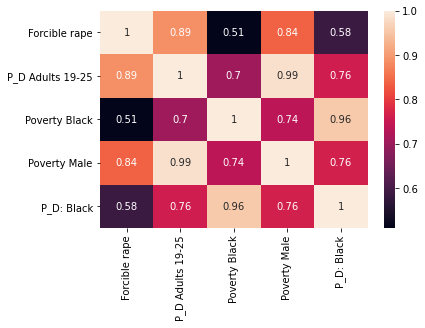

In [35]:
df_1 = pd.DataFrame(df, columns = ['Forcible rape', 'P_D Adults 19-25', 'Poverty Black', 'Poverty Male','P_D: Black'])
sns.heatmap(df_1.corr(), annot=True)

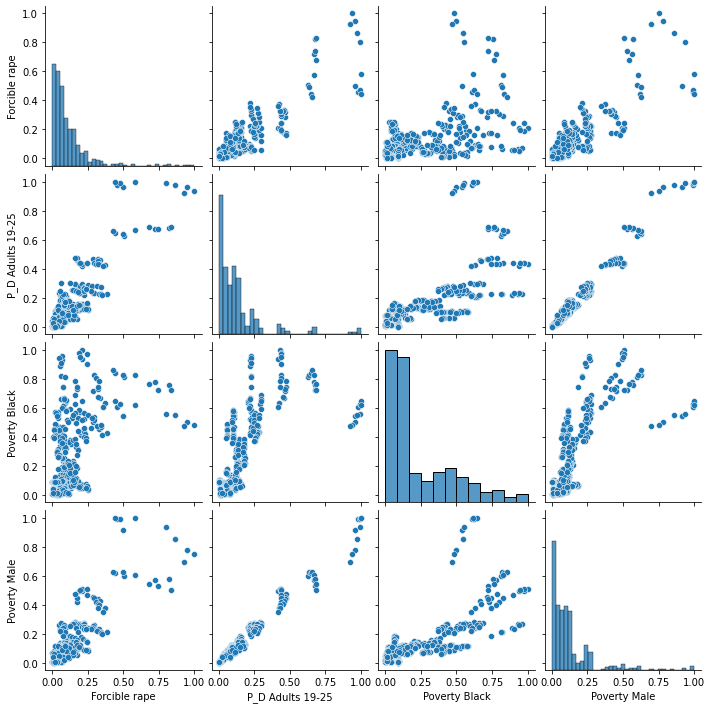

In [31]:
sns.pairplot(df_sklearn[['Forcible rape', 'P_D Adults 19-25', 'Poverty Black', 'Poverty Male']])

<AxesSubplot:>

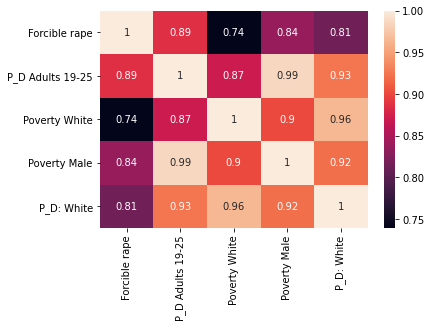

In [39]:
df_2 = pd.DataFrame(df, columns = ['Forcible rape', 'P_D Adults 19-25', 'Poverty White', 'Poverty Male','P_D: White'])
sns.heatmap(df_2.corr(), annot=True)

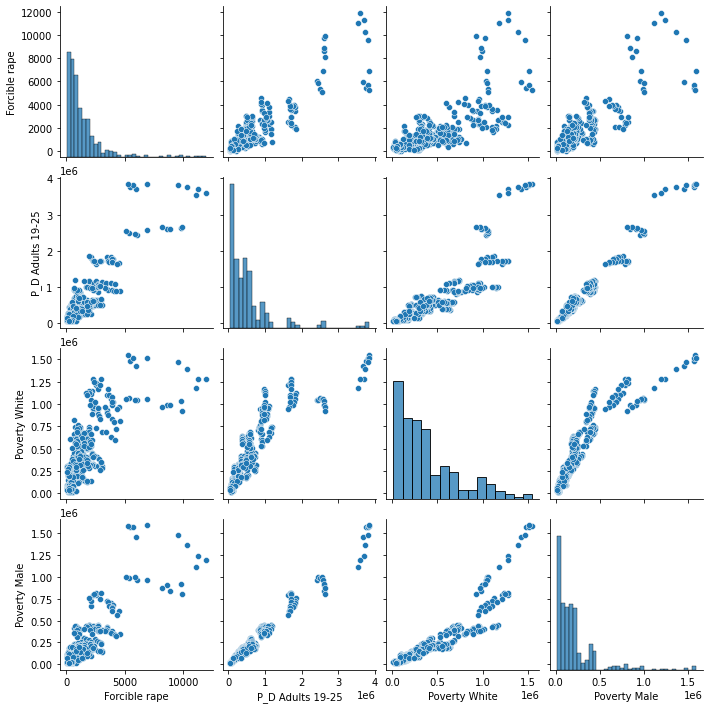

In [36]:
sns.pairplot(df[['Forcible rape', 'P_D Adults 19-25', 'Poverty White', 'Poverty Male']])

## Rape cases - Distibution of White and Black population

We can see by this scatter the white population cases are spread across, while the black population rape cases are drastically arise.


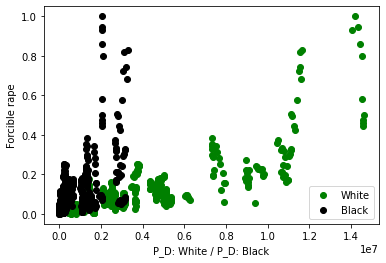

In [25]:
## Rape Black/ White pop ##
###########################

plt.scatter(df['P_D: White'],df_sklearn['Forcible rape'],label='White',color='green')
plt.scatter(df['P_D: Black'],df_sklearn['Forcible rape'],label='Black',color='black')


plt.xlabel('P_D: White / P_D: Black')
plt.ylabel('Forcible rape')
plt.legend()

## Murder in Republican / Democrats states

We ploted the viloin figure to display correlation between Republican / Democrat states in Murder crimes.
Most of the murder cases are concentrated around the median of the violin figures (White Dot).
We can see that the shape of the Republican violin differs a bit from the Democrat due to the fact there are more cases in the Republican states as opposed to Democart.
We can also see the top of the Democrat violin is higher due a outlier.

<Figure size 432x288 with 0 Axes>

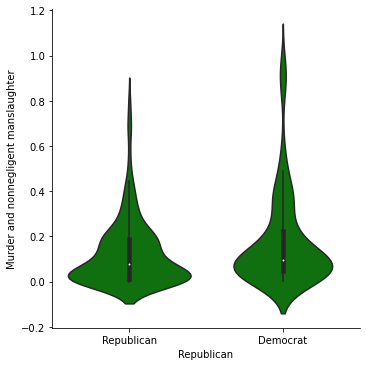

In [56]:
## Murder in Republican/ Non Rebulican states ##
################################################
fig = plt.figure()
temp_df = df_sklearn.copy()
temp_df['Republican'] = np.where(temp_df['Republican'] == 1,'Republican','Democrat')
col_list = temp_df[['Republican','Murder and nonnegligent manslaughter Cases']]
sns.catplot(x='Republican', y='Murder and nonnegligent manslaughter', kind="violin", data=col_list,color='green')


## Burglary and Robbery of Citizen and Non-Citizen correlation

In this heatmap and scatter we wanted to see if is there any indication of a Burglary and Robbery crimes based on a Citizenship Staus.

Although there is a high correlation we cannot determine whether Non-Citizen are making more Burglary and Robbery crimes.


<AxesSubplot:>

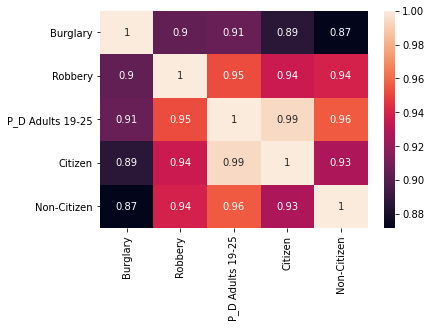

In [28]:
df_4 = pd.DataFrame(df, columns = ['Burglary','Robbery', 'P_D Adults 19-25', 'Citizen', 'Non-Citizen'])
sns.heatmap(df_4.corr(), annot=True)

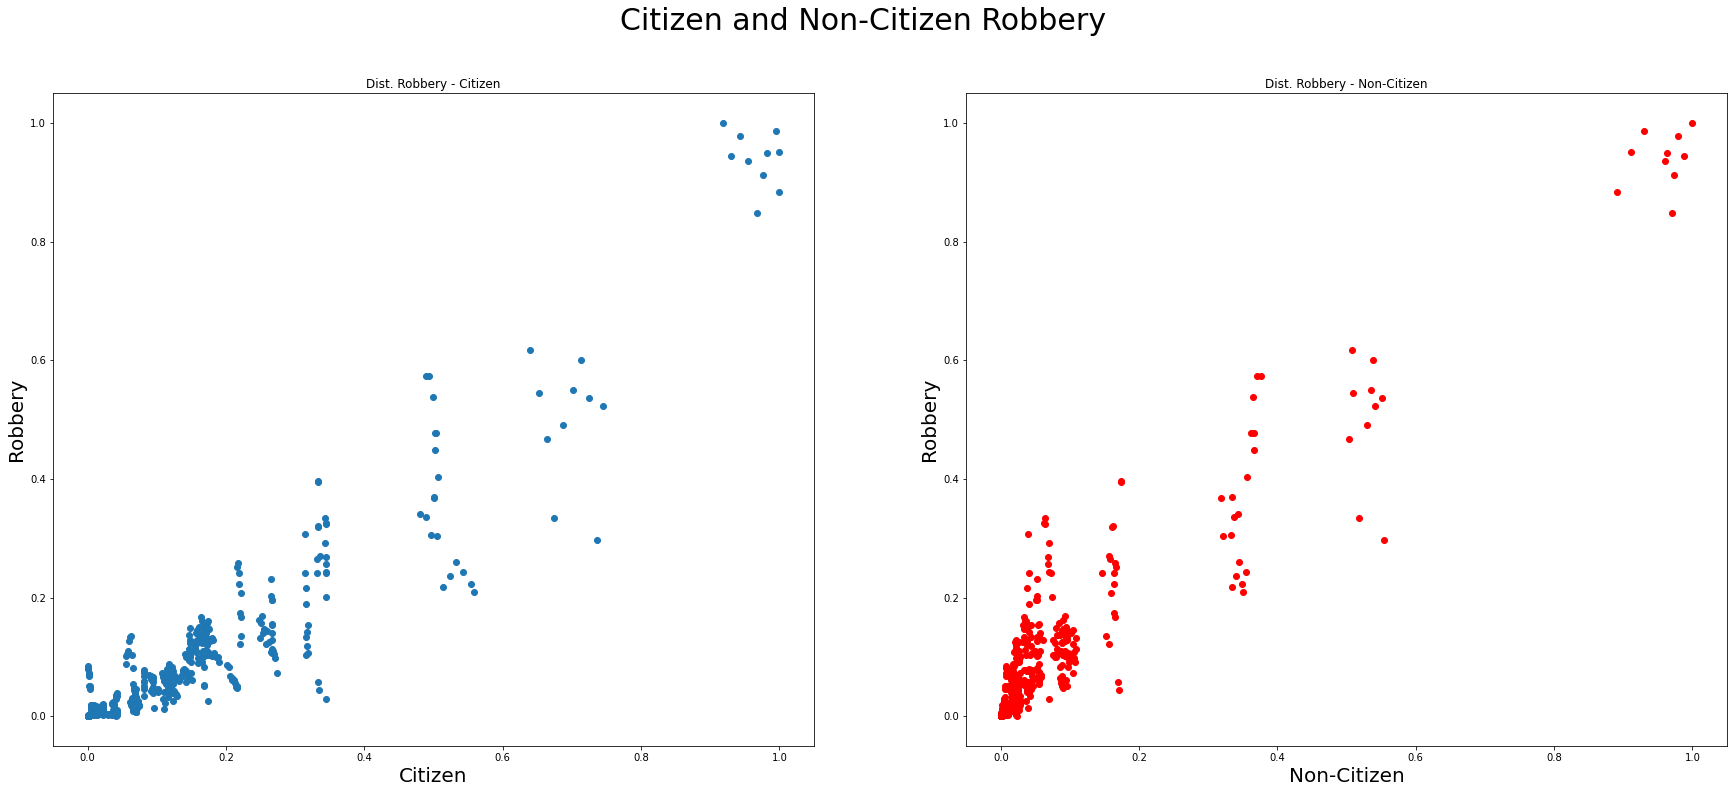

In [16]:
## Citizen / non Citizen Robbery ## 
###################################

fig, axs = plt.subplots(1,2,figsize=(30,12),sharex=True)
fig.suptitle('Citizen and Non-Citizen Robbery',fontsize=30)

axs[0].scatter(df_sklearn['Citizen'],df_sklearn['Robbery'])
axs[0].set(title='Dist. Robbery - Citizen', ylabel='Robbery',xlabel = 'Citizen',autoscale_on = True)
axs[0].xaxis.label.set_size(20)
axs[0].yaxis.label.set_size(20)

axs[1].scatter(df_sklearn['Non-Citizen'],df_sklearn['Robbery'],color='red')
axs[1].set(title='Dist. Robbery - Non-Citizen', ylabel='Robbery',xlabel = 'Non-Citizen',autoscale_on = True)
axs[1].xaxis.label.set_size(20)
axs[1].yaxis.label.set_size(20)

## Robbery and insurance correlation

We took several different insurance varibles and found out that there is high correlation between Robbery and insurance coverage of employer and medical of 0.94. In contrast to a military coverage which correlates of 0.66.   

<AxesSubplot:>

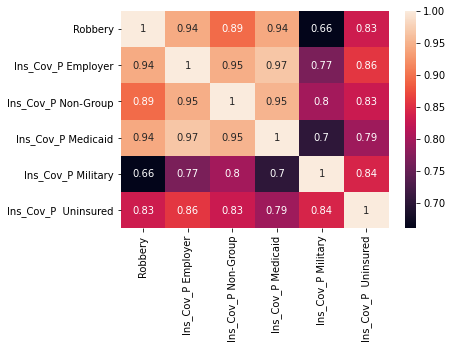

In [18]:
## Robbery and insured correlaiton# 
###################################

df_6 = pd.DataFrame(df_sklearn, columns = ['Robbery','Ins_Cov_P Employer','Ins_Cov_P Non-Group','Ins_Cov_P Medicaid' ,'Ins_Cov_P Military','Ins_Cov_P  Uninsured'])
sns.heatmap(df_6.corr(), annot=True)



<AxesSubplot:>

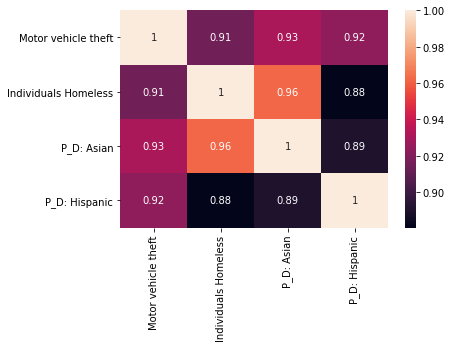

In [19]:
df_7 = pd.DataFrame(df_sklearn, columns = ['Motor vehicle theft','Individuals Homeless','P_D: Asian','P_D: Hispanic'])
sns.heatmap(df_7.corr(), annot=True)


## Crime tendency over 2010 - 2019

In [8]:
df_crime_city = pd.DataFrame()
path = "./proj_datasets/merge_T_8_and_78.xlsx"
df_crime_city = pd.read_excel(path)


In [11]:
############# Aggregating crime per year ############

df_crime_city.sort_values(by=['Year'], ignore_index=True)
year=[]
burg = []
murder = []
rape = []
robb = []
assault = []
propcrim= []
theft = []
arson = []
cops=[]

for i in range(10):
    year.append(2010+i)
    burg.append    (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Burglary'].sum())
    murder.append  (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Murder and nonnegligent manslaughter'].sum())
    rape.append    (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Forcible rape'].sum())
    robb.append    (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Robbery'].sum())
    assault.append (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Aggravated assault'].sum())
    propcrim.append(df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Property crime'].sum())
    theft.append   (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Larceny-theft'].sum()+df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Motor vehicle theft'].sum())
    arson.append   (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Arson1'].sum())
    cops.append   (df_crime_city.loc[df_crime_city['Year']==int('201'+str(i))]['Total_Police force'].sum())
    
df_crime = pd.DataFrame(year, columns = ['Year'])   
df_crime.insert(len(df_crime.columns), column='Murder and nonnegligent manslaughter', value=murder)
df_crime.insert(len(df_crime.columns), column='Forcible rape', value=rape)
df_crime.insert(len(df_crime.columns), column='Robbery', value=robb)
df_crime.insert(len(df_crime.columns), column='Aggravated assault', value=assault)
df_crime.insert(len(df_crime.columns), column='Property crime', value=propcrim)
df_crime.insert(len(df_crime.columns), column='Theft', value=theft)
df_crime.insert(len(df_crime.columns), column='Arson', value=arson)
df_crime.insert(len(df_crime.columns), column='Total police force', value=cops)

[Text(0.5, 0, 'Year'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 0, 'Year')]

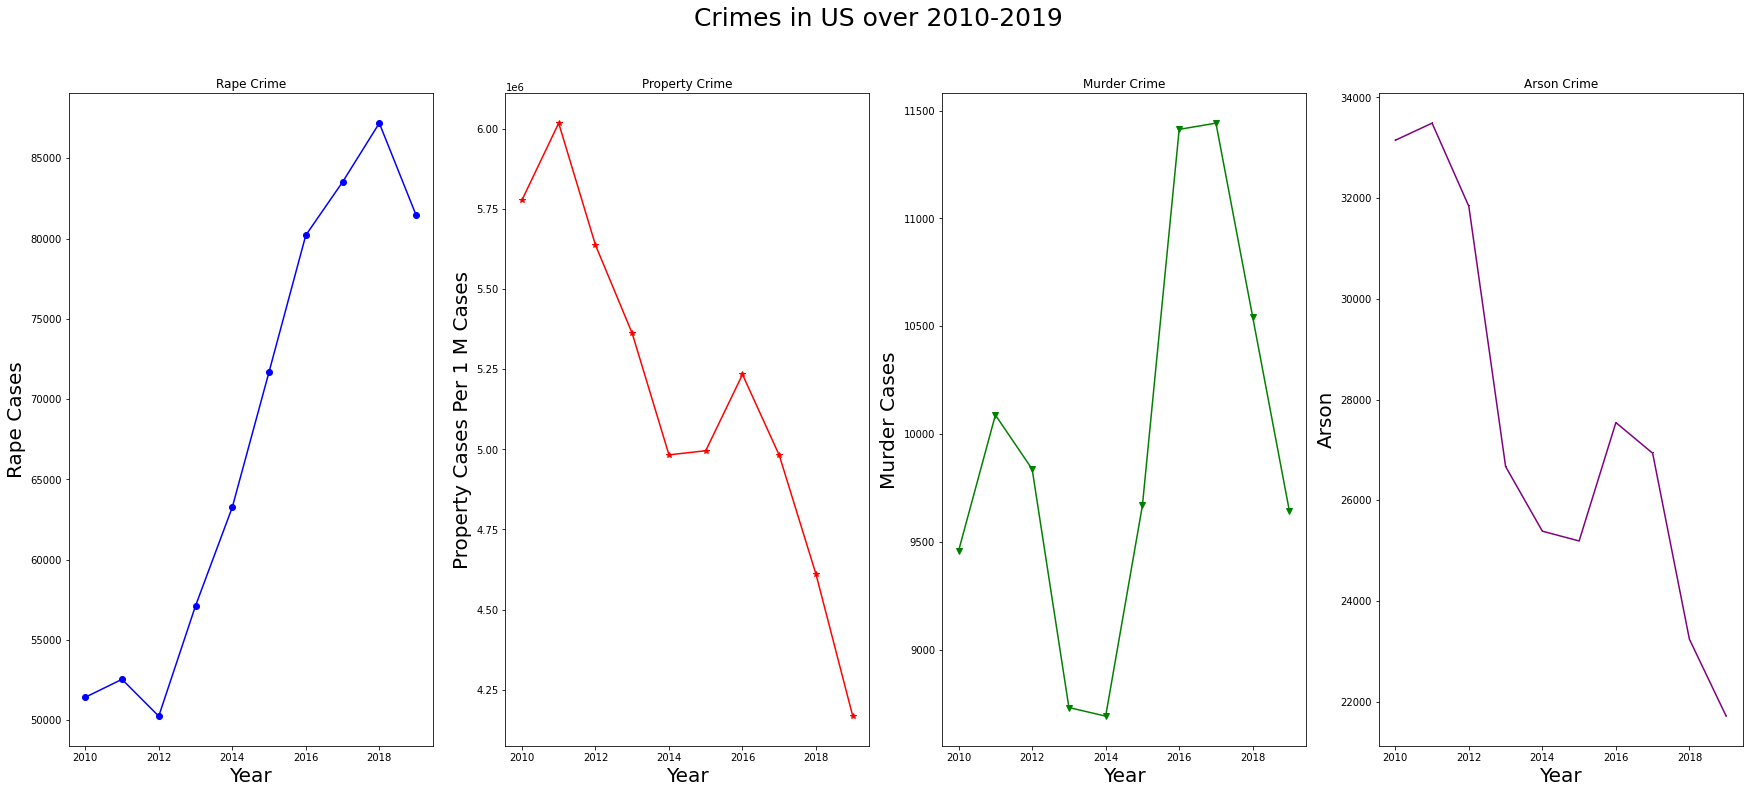

In [13]:
## DARW 1 fig with 4 line plot ######
## Crimes over 2010-2019 ############
#####################################

fig, axs = plt.subplots(1,4,figsize=(30,12),sharex=True)
fig.suptitle('Crimes in US over 2010-2019',fontsize=25)

#### Rape Graph ###
axs[0].plot(df_crime['Year'],df_crime['Forcible rape'],color='blue', marker='o')## Plot the figure
axs[0].set(title='Rape Crime', ylabel='Rape Cases',autoscale_on = True)## Set title and lables
axs[0].xaxis.label.set_size(20)
axs[0].yaxis.label.set_size(20)

#### Property Crime ####
axs[1].plot(df_crime['Year'],df_crime["Property crime"],color='red', marker='*')## Plot the figure
axs[1].set(title='Property Crime', ylabel='Property Cases Per 1 M Cases',autoscale_on = True)## Set title and labes
axs[1].xaxis.label.set_size(20)
axs[1].yaxis.label.set_size(20)

#### Murder Graph ###
axs[2].plot(df_crime['Year'],df_crime['Murder and nonnegligent manslaughter'],color='green', marker='v')## Plot the figure
axs[2].set(title='Murder Crime', ylabel='Murder Cases',autoscale_on = True)## Set title and labes
axs[2].xaxis.label.set_size(20)
axs[2].yaxis.label.set_size(20)

#### Arson Crime ####
axs[3].plot(df_crime['Year'],df_crime["Arson"],color='purple', marker=',') ## Plot the figure
axs[3].set(title='Arson Crime', ylabel='Arson',autoscale_on = True)  ## Set title and labes
axs[3].xaxis.label.set_size(20)
axs[3].yaxis.label.set_size(20)

plt.setp(axs[:], xlabel='Year') # share x lable


## Total law enforcement over population

This graph will describe the relation of total law enforcement over population.
We wanted to see if this relation may has a correlation to indicate whether high number of law enforcement results high crime numbers.

We took the max and min relation which resulted that District of Colombia has the highest relation and UTAH has the min relation.
We thought that high relation of law enfocrement will yeild low crime numbers, but according to the bar graph Colombia had higher crime rates than UTAH.
Therefore, we can conclude that high law enforcement numbers does not lower the crime rates.

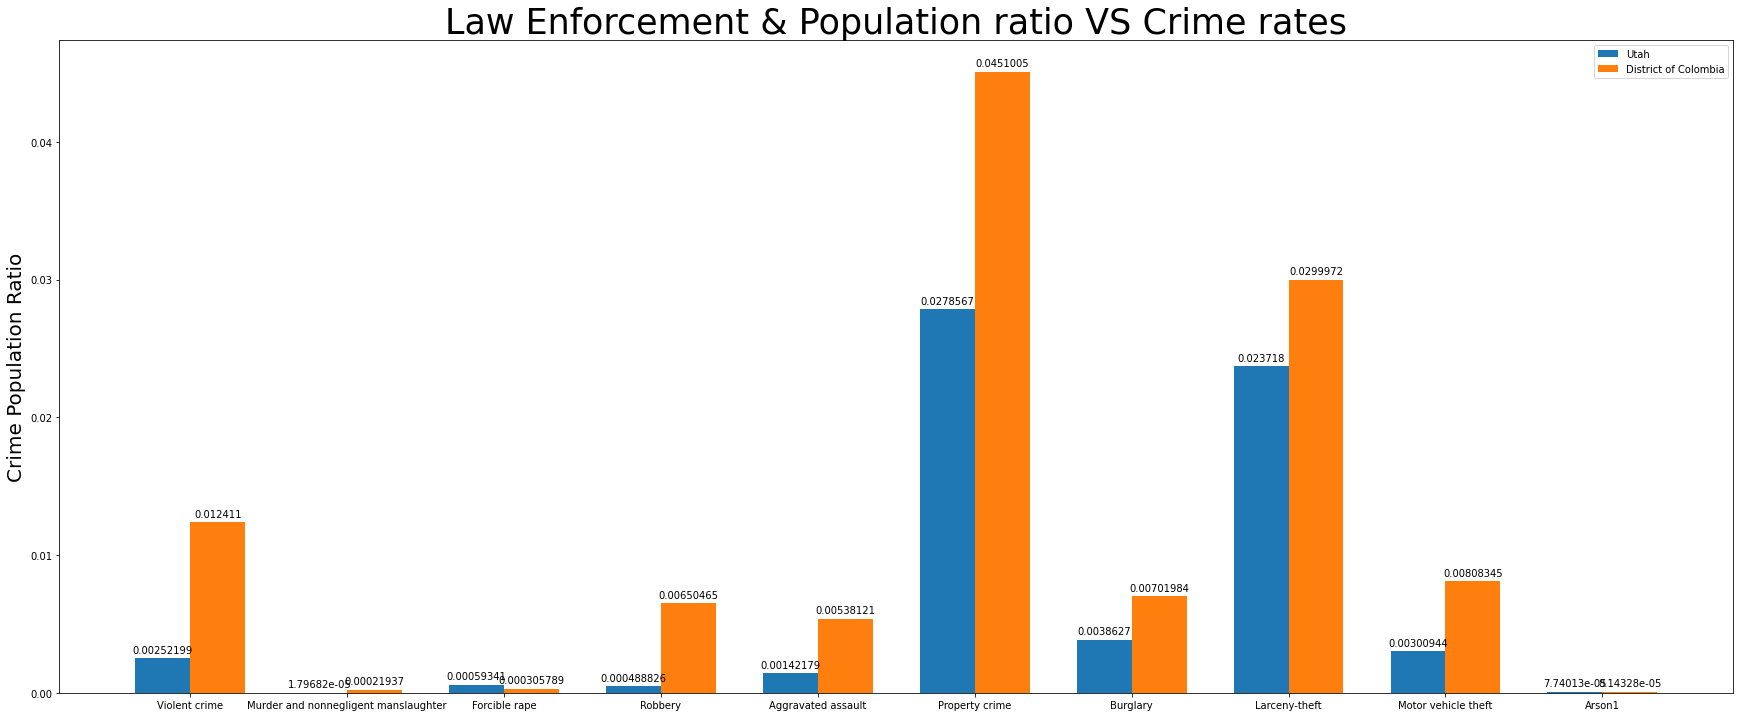

In [37]:

## we didn't take top Population cop ratio because the we had outlieres (Utah population ~~ 2M, and the top was ~~ 1.3M) ####

df_Y_S=df_crime_city.groupby(['Year','State']).sum().reset_index()

new_col=df_Y_S['Total_Police force']/df_Y_S['Population']
df_Y_S['Pop cop ratio']=new_col

min_val = df_Y_S.loc[df_Y_S['Pop cop ratio'] == df_Y_S['Pop cop ratio'].min()].State
max_val = df_Y_S.loc[df_Y_S['Pop cop ratio'] == df_Y_S['Pop cop ratio'].max()].State

## Cols values 
col_vals = df_Y_S.columns[4:14]
col_vals


#### Colombia values

### Population 
population_max = int((df_Y_S.loc[df_Y_S['Pop cop ratio'] == df_Y_S['Pop cop ratio'].max()]).iloc[:,3])

## List of crimes values Colombia 
max_row = df_Y_S.loc[df_Y_S['Pop cop ratio'] == df_Y_S['Pop cop ratio'].max()].iloc[:,4:14].values.tolist()[0] #list of criems values
max_row

## Normalization of crimes 
## crime / pop in Colombia
div_crimes_list_max = []
for crime in range (len(max_row)):
    div_crimes_list_max.append((max_row[crime] / population_max))
div_crimes_list_max # colombia 

#################################################################################
## UTAH 2015 
row_2015 = list(df_Y_S.sort_values(by=['Pop cop ratio']).iloc[1,4:14])
row_2015

population_2015 = int(df_Y_S.sort_values(by=['Pop cop ratio']).iloc[1,3])
population_2015

## crime / pop in 2015
div_crimes_list_2015 = []
for crime in range (len(row_2015)):
    div_crimes_list_2015.append((row_2015[crime] / population_2015))
div_crimes_list_2015

#################################################################################

## Begin drawing ##

labels = col_vals
div_crimes_list_2015 # utah 
div_crimes_list_max # colombia 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(30,12))
rects1 = ax.bar(x - width/2, div_crimes_list_2015, width, label='Utah')
rects2 = ax.bar(x + width/2, div_crimes_list_max, width, label='District of Colombia')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Crime Population Ratio',fontsize='20')
ax.set_title('Law Enforcement & Population ratio VS Crime rates',fontsize='35')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
#fig.tight_layout()

plt.show()